In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [12]:
# Load datasets
customers_data = pd.read_csv("/Users/narasimha/Downloads/zeotap intern/Customers.csv")
products_data = pd.read_csv("/Users/narasimha/Downloads/zeotap intern/Products.csv")
transactions_data = pd.read_csv("/Users/narasimha/Downloads/zeotap intern/Transactions.csv")

**Task 3: Customer Segmentation/Clustering**

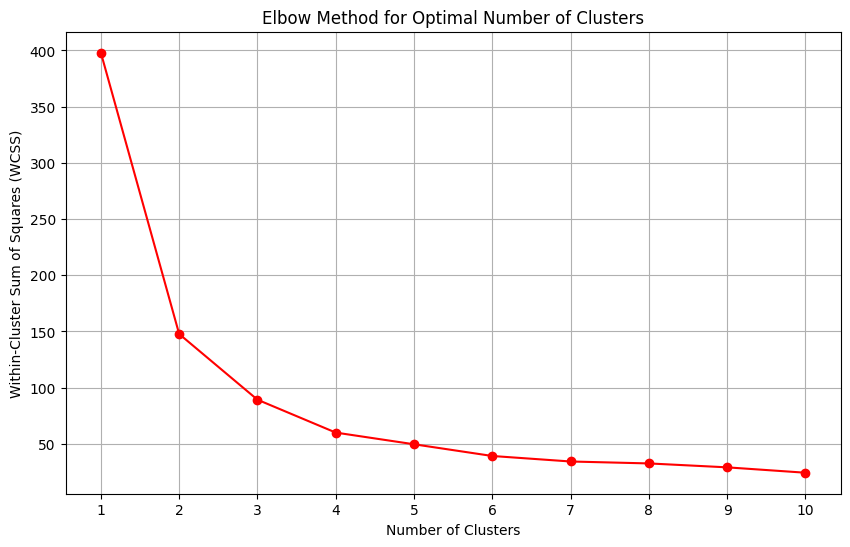

In [13]:
# Prepare data
customer_features = transactions_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

# Use the Elbow Method to determine the optimal number of clusters
wcss = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='r')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid()
plt.show()


Davies-Bouldin Index: 0.6267041632486107


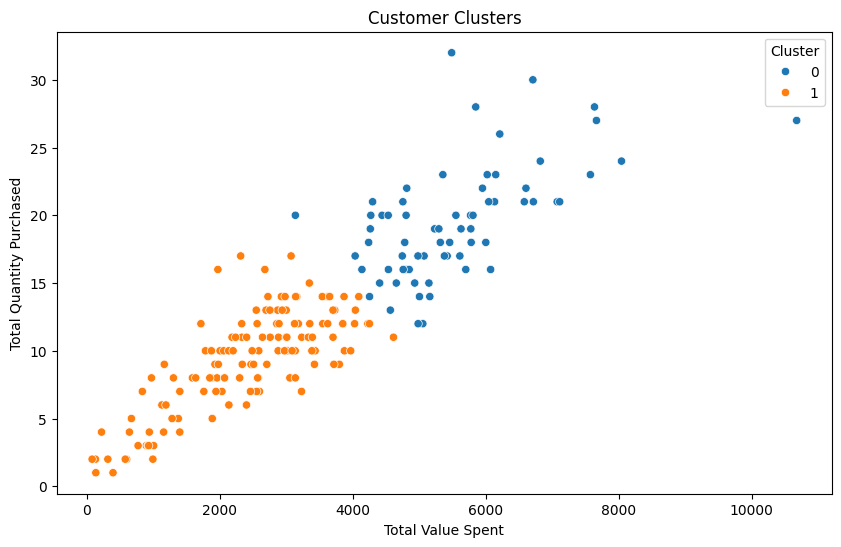


Clustering Results:
  CustomerID  TotalValue  Quantity  Cluster
0      C0001     3354.52        12        1
1      C0002     1862.74        10        1
2      C0003     2725.38        14        1
3      C0004     5354.88        23        0
4      C0005     2034.24         7        1


In [14]:
# Choose the optimal number of clusters based on the elbow point
optimal_k = 2

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate Davies-Bouldin Index for cluster evaluation
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print("\nDavies-Bouldin Index:", db_index)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='TotalValue', y='Quantity', hue='Cluster', palette='tab10')
plt.title('Customer Clusters')
plt.xlabel('Total Value Spent')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
customer_features.to_csv("Clustering_Results.csv", index=False)

print("\nClustering Results:")
print(customer_features.head())


In [15]:
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.550116764559775
